# 1주차 과제_0307(금)

핸즈온 4장 모델 훈련 p.184-203

### 4.5.1 릿지 회귀

**릿지 회귀(티호노프 규제)**

- 규제가 추가된 선형 회귀 버전

- 규제항 $\alpha\displaystyle\sum_{i=1}^n\theta_i^2$이 비용 함수에 추가됨

- 규제항은 훈련하는 동안에만 비용 함수에 추가되고 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함

- 하이퍼파라미터 $\alpha$ : 모델을 얼마나 많이 규제할지 조절, 0이면 릿지 회귀는 선형 회귀와 같아짐, 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨

**릿지 회귀의 비용 함수**

$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\displaystyle\sum_{i=1}^n\theta_i^2$

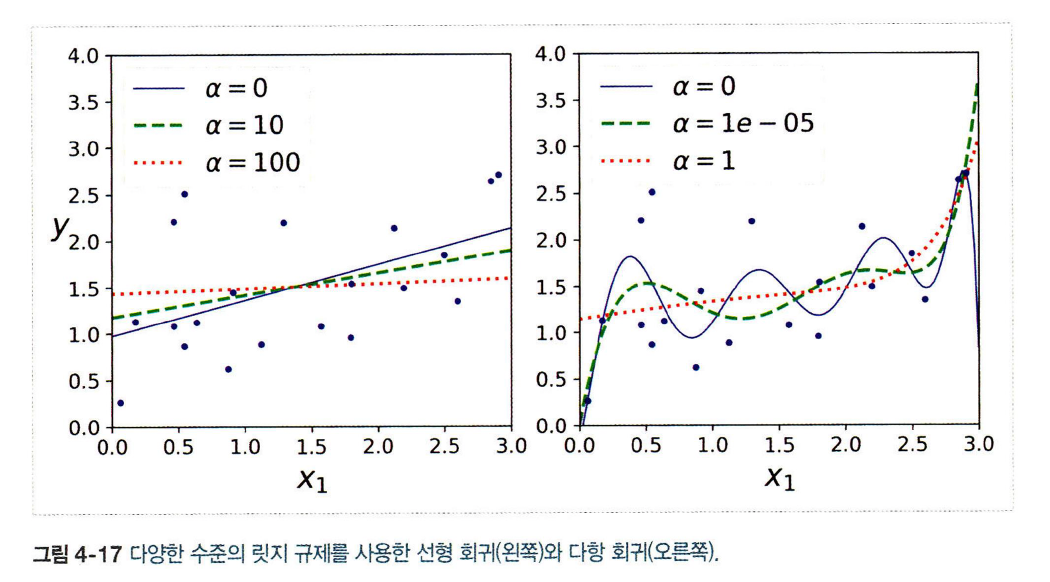

왼쪽 : 평범한 릿지 모델을 사용해 만든 선형적인 예측

오른쪽  : 규제를 사용한 다항 회귀(PolynomialFeatures(degree=10)을 사용해 데이터 확정 후 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델 적용)

↪ 모델의 분산을 줄지만 편향은 커짐

**릿지 회귀의 정규 방정식**

$\hat\theta = (X^TX+\alpha A)^{-1}X^Ty$

In [3]:
# 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([8.46415721])

In [10]:
# 확률적 경사 하강법
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.59699127])

### 4.5.2 라쏘 회귀

**라쏘(Lasso) 회귀**

- 가중치 벡터의 $\ell _1$ 노름 사용

- 덜 중요한 특성의 가중치를 제거함 → 자동으로 특성을 선책하고 희소 모델을 만듬

**라쏘 회귀의 비용 함수**

$J(\theta) = MSE(\theta)+\alpha\displaystyle\sum_{i=1}^n|\theta_i|$

라쏘의 비용 함수는 $\theta_i$ = 0 ($i=1,2,\cdots, n$ 일 때) 미분 가능하지 않음

하지만 $\theta_i$ = 0일 때 **서브그레이티언트 벡터** $g$를 사용하면 경사 하강법을 적용하는 데 문제 없음

** 라쏘 회귀의 서브그레이디언트 벡터**

$g(\theta, J) = \nabla_{\theta} \text{MSE}(\boldsymbol{\theta}) + \alpha
\begin{pmatrix}
\operatorname{sign}(\theta_1) \\
\operatorname{sign}(\theta_2) \\
\vdots \\
\operatorname{sign}(\theta_n)
\end{pmatrix}\ 여기서\ \operatorname{sign}(\theta_i) =
\begin{cases}
-1 & \theta_i < 0 \\
0 & \theta_i = 0 \\
+1 & \theta_i > 0
\end{cases}$


In [11]:
from sklearn.linear_model import Lasso # Lasso 대신 SGDRegressor(pentaly = 'l1') 사용 가능
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.36792634])

### 4.5.3 엘라스틱넷

**엘라스틱넷**

- 릿지 회귀와 라쏘 회귀를 절충한 모델

- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용, 혼합 정도는 혼합 비율 $r$을 사용해 조절

    $r$=0 : 릿지 회귀와 동일, $r$=1 : 라쏘 회귀와 동일

**엘라스틱넷 비용 함수**

$J(\theta) = MSE(\theta) + r\alpha\displaystyle\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\displaystyle\sum_{i=1}^n\theta_i^2$

In [12]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.25582672])

### 4.5.4 조기 종료

**조기 종료**

- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방식으로 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시킴

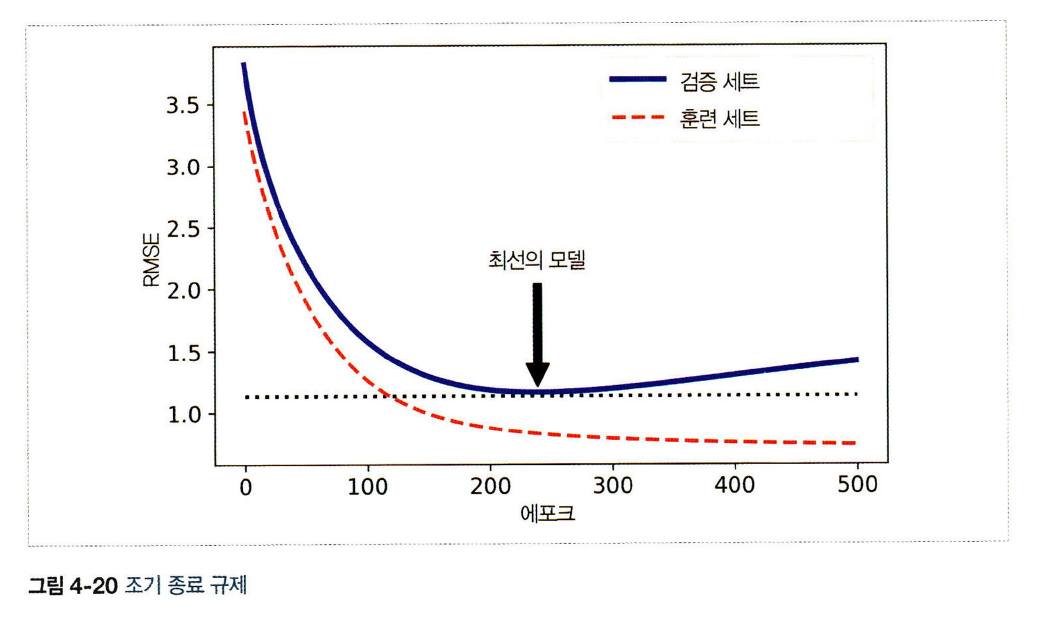

- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어듬

- 감소하던 검증 에러가 멈추었다가 다시 상승 → 모델이 훈련 데이터에 과대적합 되기 시작하는 것을 의미

- 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것

In [15]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                        penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행함
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error

## 4.6 로지스틱 회귀

샘플이 특정 클래스에 속할 확률을 추정하는데 사용

이진 분류기 : 해당 클래스에 속한다고 예측(레이블이 '1'인 양성 클래스)하거나 클래스에 속하지 않는다고 예측(레이블이 '0'인 음성 클래스)하는 것

### 4.6.1 확률 추정

**로지스틱 회귀 모델의 확률 추정(벡터 표현식)

$\hat P = h_\theta(x)=\sigma(\theta^Tx)$

- $\sigma$ : 0과 1 사이의 값을 출력하는 시그모이드 함수

**로지스틱 함수**

$\sigma(t) = \frac{1}{1+exp(-t)}$

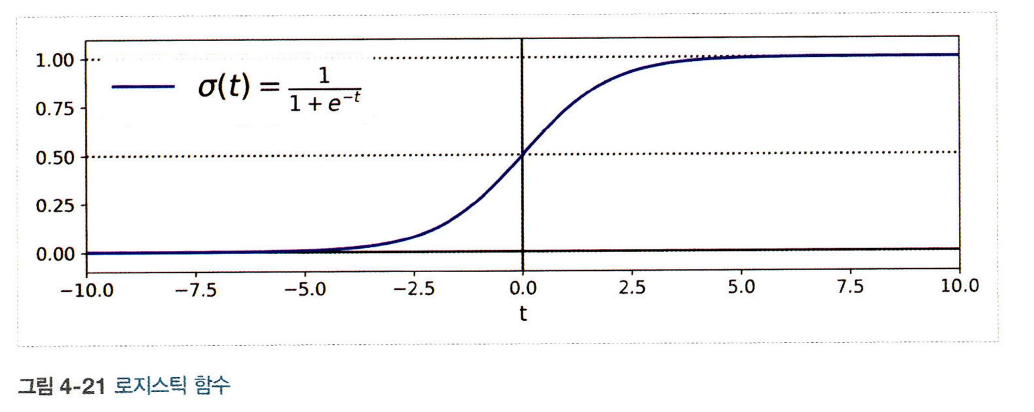

**로지스틱 회귀 모델 예측**

$\hat y = \begin{cases}
0 & \hat p < 0.5 \\
1 & \hat p \geq 0
\end{cases}$

$t$ < 0이면 $\sigma(t)$ < 0.5이고 $t$ $\geq$ 0이면 $\sigma(t)$ $\geq$ 0.5이므로 로지스틱 회귀 모델은 $\theta^Tx$가 양수일 때 1(양성 클래스)라고 예측하고 음수일 때 0(음성 클래스)라고 예측함

### 4.6.2 훈련과 비용 함수

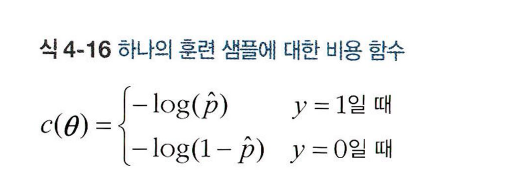

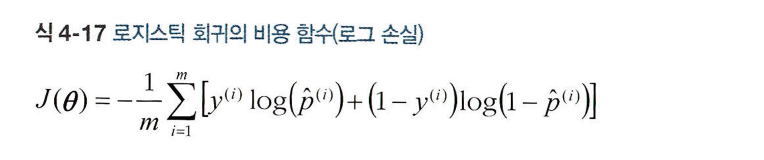

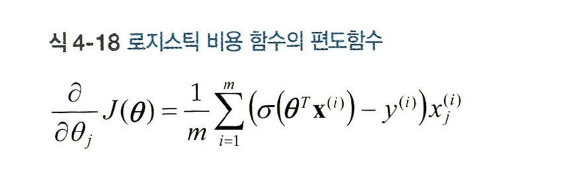

### 4.6.3 결정 경계

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [19]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [20]:
# 로지스틱 회귀 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

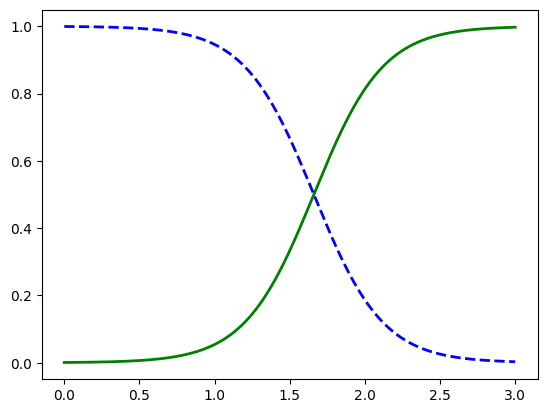

In [21]:
from matplotlib import pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [22]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀

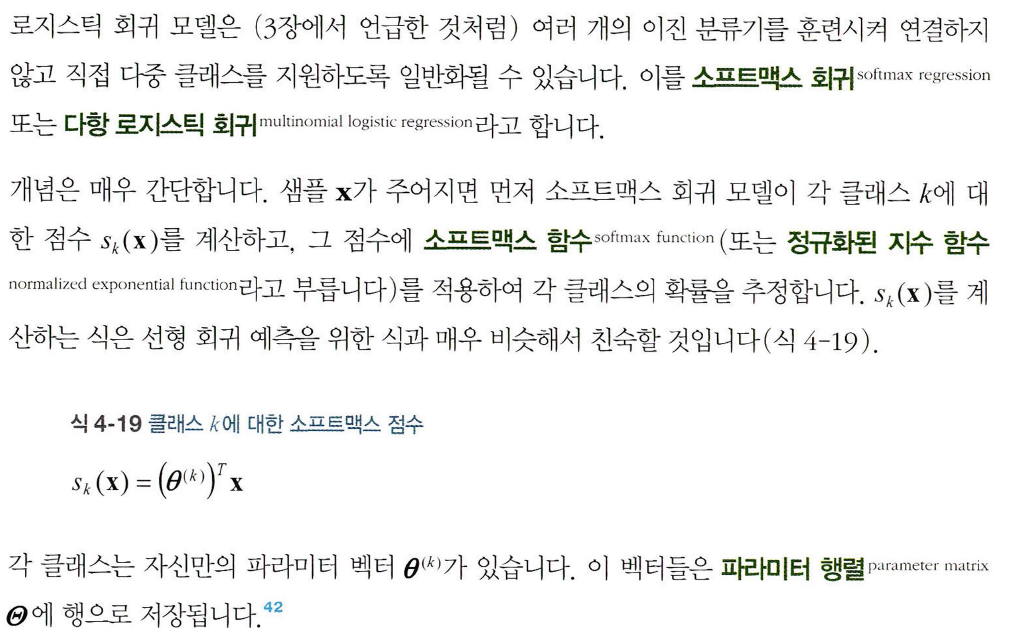

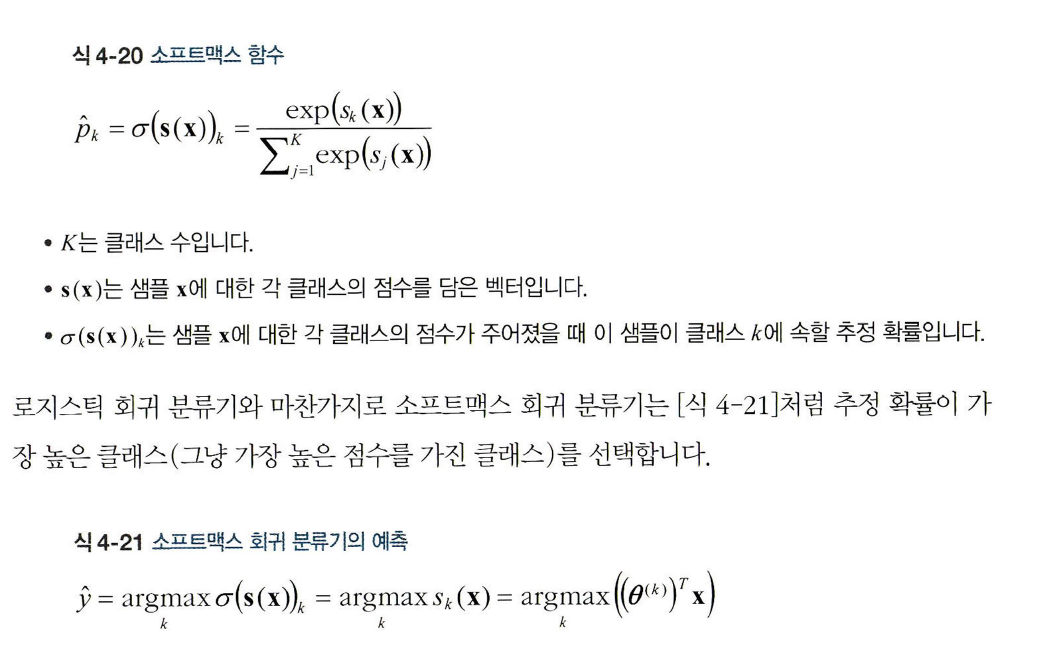



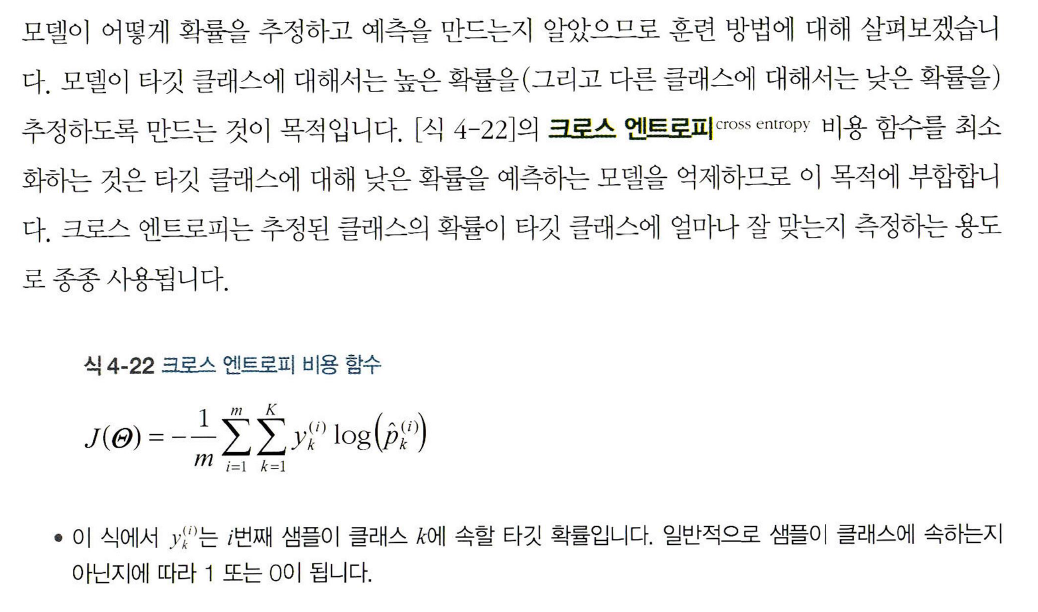

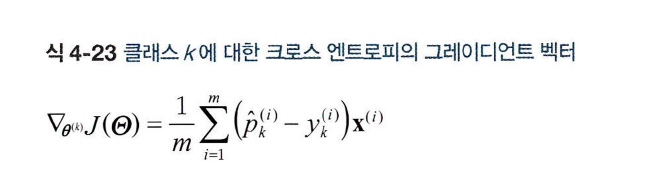

In [23]:
# 소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류하기

X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [25]:
softmax_reg.predict([[5, 2]])

array([2])

In [26]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])